# Clustering
*   Given a set of data points, group them into a clusters so that:
   *  points within each clusters are similar to each other
   *  points from different cluster are identical
*   Usually, points are in a high dimensional space, and similarity is defined using a distance measure
  *   Euclidean,cosine,Jaccard,edit distance
*   **Examples**
      *   Cluster customers based on their purchase hostories
      *   Cluster products basaed in the sets of customers who purchased them
      *   Cluster documents based on similar words or shingles
      *   Cluster DNA SEquences based on edit distance

*   **Types**
    *   Point Assignment
        * Maintain a set of clusters
        * Place the points into their nearest clusters
    *   Heirarchical Cluster
        * Key operation: repeatedly combining two cluster
    
*   **Euclidean case**:
    * Distance between the centroid of two clusters

*   **Cohesion**
    * Approach1 : Use the diameter of the merged cluster = maximum distance between points in the cluster
    * Approach2 : Use the average distance between points in the cluster
    * Approach3 : Use a density based approach take the diameter or average distance eg. divide by the number of points in the cluster

*   **Stopping Criteria**
  * Stop when we have K clusters
  * Stop when the cohesion of the cluster resulting from the best merger falls below a threshold
  * stop when there is a sudden jump in the cohesion value
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


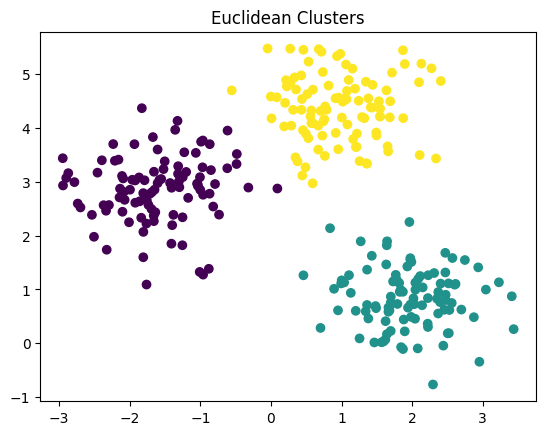

In [2]:
# prompt: give graph of eclidean clusters

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate random data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Define the model
model = KMeans(n_clusters=3)

# Fit the model
model.fit(X)

# Predict the clusters
y_pred = model.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Euclidean Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


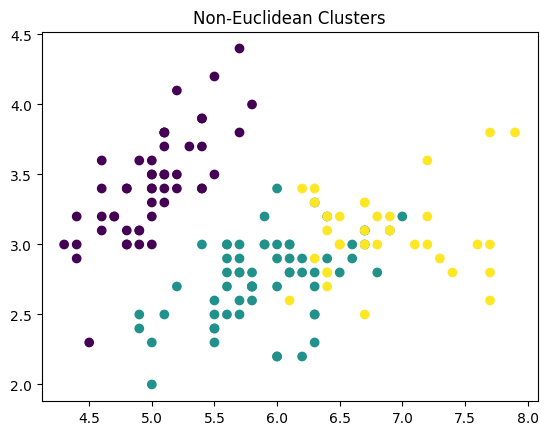

In [8]:
# prompt: non euclidean graph of clustering

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the model
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')

# Fit the model and obtain cluster labels directly
y_pred = model.fit_predict(X)  # Use fit_predict instead of separate fit and predict

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Non-Euclidean Clusters')
plt.show()

# Introduction Classification vs Clustering

In [12]:
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
array = (['setosa', 'versicolor', 'virgininca'],dtype:='<U10')

Text(0, 0.5, 'Petal Width')

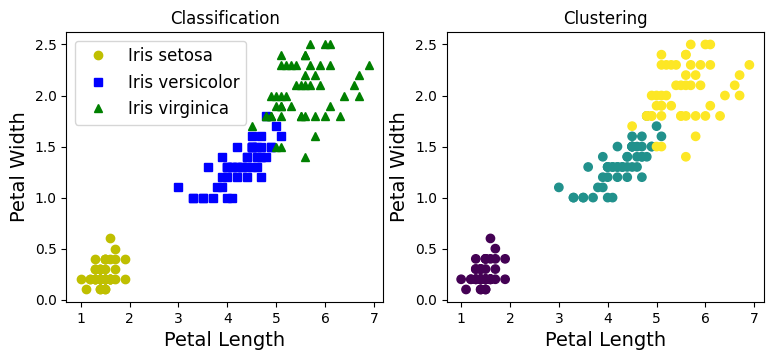

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,3.5))

plt.subplot(121)
plt.plot(x[y==0,2], x[y==0, 3],'yo', label = 'Iris setosa')
plt.plot(x[y==1,2], x[y==1, 3],'bs', label = 'Iris versicolor')
plt.plot(x[y==2,2], x[y==2, 3],'g^', label = 'Iris virginica')
plt.title('Classification')
plt.xlabel('Petal Length', fontsize = 14)
plt.ylabel('Petal Width', fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(x[:, 2], x[:, 3], c=y, cmap='viridis')
plt.title('Clustering')
plt.xlabel('Petal Length', fontsize = 14)
plt.ylabel('Petal Width', fontsize = 14)

In [16]:
from sklearn.datasets import make_blobs


In [17]:
blob_centers = np.array(
    [[0.2 , 2.3],
     [-1.5 , 2.3],
     [-2.8 , 1.8],
     [-2.8 , 2.8],
     [-2.8 , 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


In [18]:
X , y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)


In [19]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

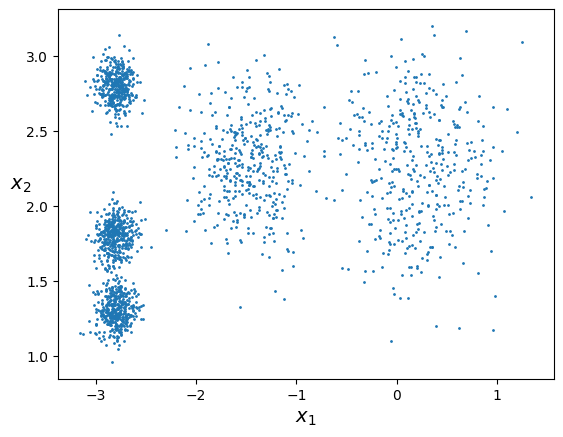

In [20]:
plot_clusters(X)

In [21]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [22]:
y

array([4, 2, 0, ..., 3, 0, 2])

# Kmeans

In [23]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [25]:
y_pred is kmeans.labels_

True

In [26]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [27]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

# Decision Boundaries

In [44]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=30, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=20, linewidths=5,
              color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

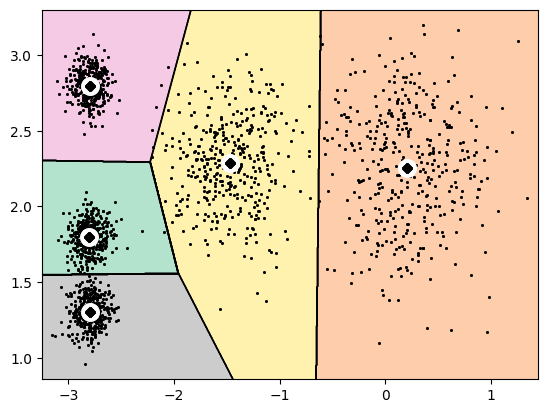

In [45]:
plot_data(X)
plot_centroids(kmeans.cluster_centers_)
plot_decision_boundaries(kmeans, X)

**Hierarchical clustering**
* Naives implementation
  * At each step,compute pairwise distances between each pair of clusters
  *O(N^3)
* Implementaiton with priority queue can reduce time O(N^2 log N)
* Too big for really big datsets that doesnt fit in memory

**Kmeans Algorithm**
* Assumes eucllidean space
* Pick k, number of clusters
* Initialize cluster by picking one point per cluster
  * Example: pick on point at random, then k-1 on the points,each as far away as possible form the previous points
* Try different K, looking at the centre at the change in the average distnance to centroid, a K increase

# Basic Python
**Functions**


In [46]:
#Funciton definition
def times(x,y):
  return x*y

In [47]:
#Calling
times(4,5)


20

In [48]:
def intersect(seq1,seq2):
  result = []
  for x in seq1:
    if x in seq2:
      result.append(x)
  return result

In [51]:
intersect([1,3],[3,4,5,6])

[3]